In [1]:
import time
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from numpy import fft
import random


<center>
    <h1>Fast Fourier Transform</h1>
</center>

For our first display of the fast fourier transform and how it works, we will apply it on 3 functions:

- sin(x)
- sin(15x)
- sin(x)+sin(15x)

The resulting graphs are shown below. First using the Naive approach, and then using the Divide-and-Conquer Recursive Implementation to the DFT. We should notice the 2 graphs are identical, and the 2 approaches give the same result.

In [2]:
def sin1(x):
    return np.sin(x)


def sin2(x):
    return np.sin(15 * x)


def sin3(x):
    return sin1(x) + sin2(x)


In [3]:
def get_range(x, function):
    return [function(i) for i in x]

In [4]:
X = np.linspace(0, 4 * np.pi, 1024)

y1 = get_range(X, sin1)
y2 = get_range(X, sin2)
y3 = get_range(X, sin3)

## Discrete Fourier Transform

The following code is the naive approach to calculating DFT. It simply uses the following mathematical formula:


<center>
    <img src="images/dftformula.png" style="width:300px;height:100px;">
<center>

The time complexity is O(n^2) as there are 2 for loops running for each n iterations.

In [5]:
def calculate_dft(Y):
    dft = [0 for _ in range(len(Y))]
    for i in range(len(Y)):
        for j in range((len(Y))):
            tmp = [((0 - 1j) * (2 * np.pi * i * j)) / len(Y)]
            dft[i] += Y[j] * np.exp(tmp)
    return dft

In [6]:
dft1 = calculate_dft(y1)
dft2 = calculate_dft(y2)
dft3 = calculate_dft(y3)

## Recursive Divide-and-Conquer Algorithm

The following cell contains the Divide-and-Conquer Algorithm. It splits the DFT computation into 2 smaller parts, the even and the odd. Each subproblem requires only half the computations, and we recursively apply this to convert our O(n^2) algorithm to a O(nlogn) algorithm. 

We can find the recurrence relation for this code. It is actually identical to that of mergesort, T(n) = 2T(n/2) + O(n). Each subproblem is divided into 2 halves, and the cost of merging is O(n).

In [7]:
def fft_rec(X):
	N = len(X)

	if N <= 1:
		return X

	omega = np.exp(complex(0, 2 * np.pi)/ N)

	pe = np.array(X[0:N:2])
	po = np.array(X[1:N:2])

	ye = fft_rec(pe)
	yo = fft_rec(po)

	y = [0 for i in range(N)]

	for j in range(0, N//2):
		y[j] = ye[j] + omega**j * yo[j]
		y[j+N//2] = ye[j] - omega**j * yo[j]
	return y 


def calculate_fft(Y):
    return fft_rec(Y)

In [8]:

fft1 = calculate_fft(y1)
fft2 = calculate_fft(y2)
fft3 = calculate_fft(y3)

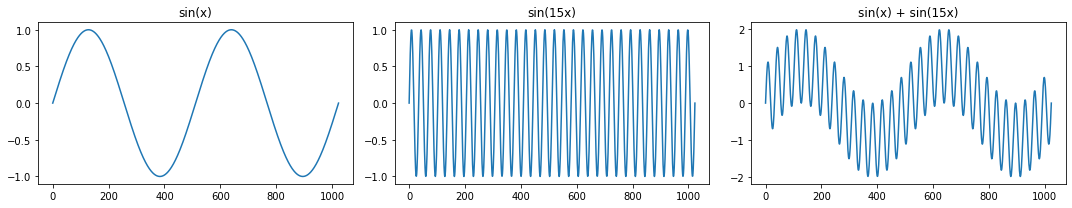

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
Y = [y1, y2, y3]
labels = ['sin(x)', 'sin(15x)', 'sin(x) + sin(15x)']
for i in range(3):
    axes[i].plot(Y[i])
    axes[i].set_title(labels[i])
fig.tight_layout()


The following graph depicts the FFT being applied to the above sin waves. We can see that the FFT is essentially decomposing the 2 sin waves into 2 distinct frequencies after they had been added together in the final graph.

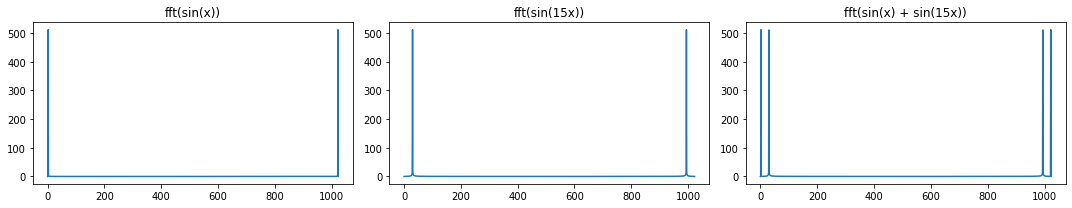

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
Y = [np.abs(fft1), np.abs(fft2), np.abs(fft3)]
labels = ['fft(sin(x))', 'fft(sin(15x))', 'fft(sin(x) + sin(15x))']
for i in range(3):
    axes[i].plot(Y[i])
    axes[i].set_title(labels[i])
fig.tight_layout()


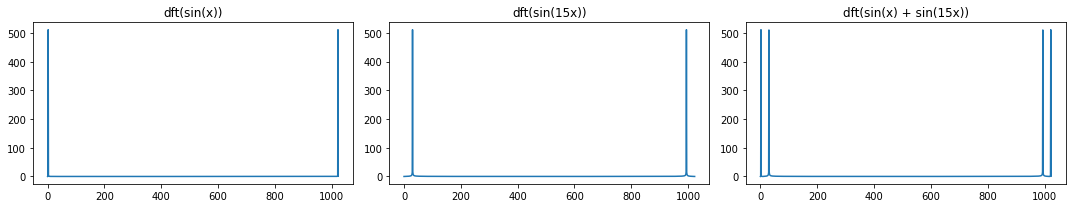

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
Y = [np.abs(dft1), np.abs(dft2), np.abs(dft3)]
labels = ['dft(sin(x))', 'dft(sin(15x))', 'dft(sin(x) + sin(15x))']
for i in range(3):
    axes[i].plot(Y[i])
    axes[i].set_title(labels[i])
fig.tight_layout()


In [12]:
start = time.time_ns() / (10**9)
calculate_fft(y3)
end = time.time_ns() / (10**9)

time_fft = end - start

In [13]:
start = time.time_ns() / (10**9)
calculate_dft(y3)
end = time.time_ns() / (10**9)

time_dft = end - start

In [14]:
print("Time for fft: {}".format(time_fft))
print("Time for dft: {}".format(time_dft))

Time for fft: 0.040242910385131836
Time for dft: 6.445752859115601


A check that every element calculated is approximately the same across Naive implementation, D&C, and the NumPy library implementation.

In [15]:
# Check output is the same
lib_fft = np.fft.fft(y3)
flag = True
for i in range(len(Y)):

    if (np.round(np.abs(dft3[i]), 8) != np.round(np.abs(fft3[i]), 8) or np.round(np.abs(dft3[i]), 8) != np.round(np.abs(lib_fft[i]), 8)): flag = False

print("Output rounded to 8 digits the same (DFT, FFT, FFT Library Implementation): ", flag)


Output rounded to 8 digits the same (DFT, FFT, FFT Library Implementation):  True


In [16]:
X = np.linspace(0, 4 * np.pi, 1024)

y1 = get_range(X, sin1)
y2 = get_range(X, sin2)
y3 = get_range(X, sin3)

In [17]:
def get_time(function, args):
    start = time.time_ns() / (10**9)
    function(*args)
    end = time.time_ns() / (10**9)
    return end - start

Divide-and-Conquer Empirical Time Analysis

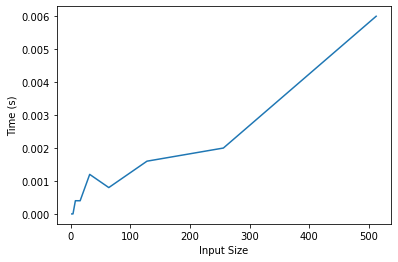

In [18]:
avg_times_fft = []

powers_of_2 = list(2**p for p in range(1, 10))
for n in powers_of_2:
    X = np.linspace(0, random.random() * random.randint(2, 100), n)
    Y = get_range(X, sin3)

    times = [get_time(calculate_fft, (Y,)) for _ in range(10)]
    avg_times_fft.append(np.mean(times))

plt.xlabel("Input Size")
plt.ylabel("Time (s)")
plt.plot(powers_of_2, avg_times_fft)
plt.show()

Naive DFT Empirical Time Analysis

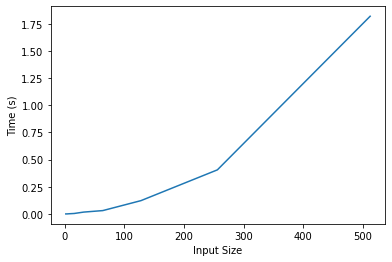

In [19]:
avg_times = []

powers_of_2 = list(2**p for p in range(1, 10))
for n in powers_of_2:
    X = np.linspace(0, random.random() * random.randint(2, 100), n)
    Y = get_range(X, sin3)

    times = [get_time(calculate_dft, (Y, )) for _ in range(5)]
    avg_times.append(np.mean(times))

plt.xlabel("Input Size")
plt.ylabel("Time (s)")
plt.plot(powers_of_2, avg_times)
plt.show()

Comparison of Naive and Divide-and-Conquer Implementations

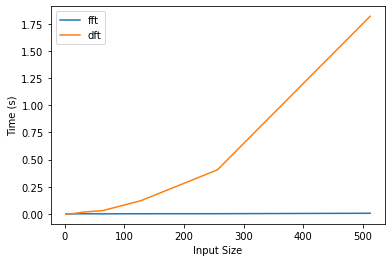

In [20]:
plt.plot(powers_of_2, avg_times_fft, label = "fft")
plt.plot(powers_of_2, avg_times, label = "dft")
plt.xlabel("Input Size")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

## Applying Fast Fourier Transform on an audio file

We use 2 audio files to show the main functionality the FFT allows in signal processing.

1. Piano chord being played repeatedly.
2. Background noise while walking in a city.

Looking at the first graph below, we see the signal for the piano chord being played repeatedly. We can physically see the chord being repeated in this signal.
In the second graph, we see the signal for the noises in the city. It is more noisy and there are alot more noises mixed in.

Essentially, the FFT converts our time domain signal into the frequency domain. It unmixes the frequencies mixed in to the final sound to seperate distinct sounds. In signal processing, this would allow us to identify background noises, or noises to isolate. The FFT identifies the piano chord and we can see this as a peak on the graph. For the second FFT graph, there are alot more noises in the final audio track. These different noises are identified and the most frequent ones are displayed as the highest peaks.

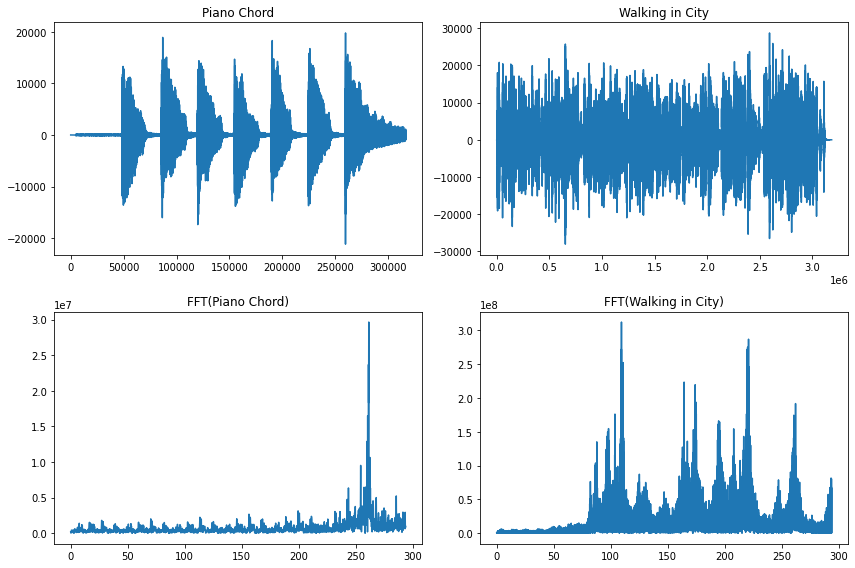

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
Y1 = []
Y2 = []

# scan corpus of music for all wav files
with os.scandir('music/') as it:
    for entry in it:
        if entry.name.endswith(".wav") and entry.is_file():

            fn = entry.path
            fs_rate, signal = wav.read(fn)

            # convert stereo to mono
            signal = signal.mean(axis=1)
            Y1.append(signal)

            sp = calculate_fft(signal)
            freq = fft.fftfreq(len(sp), 1 / fs_rate)
            Y2.append([sp, freq, signal.shape[0]])

            '''
            Naive approach is too slow to run for an 11 second audio clip. 
            Signal Length = 550912
            FFT O(nlogn) = 3162831
            DFT O(n^2) = 303504031744 
            DFT runs approximately 100,000 times slower than FFT.
            The second audio file is much longer.
            '''
            # naive dft approach plot
            # S = [0 for _ in range(signal.shape[0])]
            # for i in range(signal.shape[0]):
            #     for j in range(signal.shape[0]):
            #         tmp = [((0-1j)*(2*np.pi*i*j)) / signal.shape[0]]
            #         S[i] += signal[j] * np.exp(tmp)
            #     print(i)
            # freq = fft.fftfreq(len(S), 1 / fs_rate)
            # plt.plot(freq, np.abs(S.real))
            # plt.show()
labels = ['Piano Chord', 'Walking in City']
for i in range(2):
    axes[0][i].plot(Y1[i])
    axes[0][i].set_title(labels[i])


labels = ['FFT(Piano Chord)', 'FFT(Walking in City)']
for i in range(2):
    axes[1][i].plot(Y2[i][1][:Y2[i][2]//150], np.abs(Y2[i][0][:Y2[i][2]//150]))
    axes[1][i].set_title(labels[i])
fig.tight_layout()